# [실습] 이변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 Y

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [55]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [56]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

In [57]:
feature = 'crim'

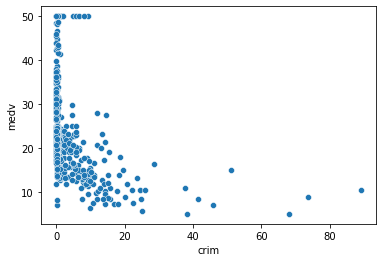

In [58]:
sns.scatterplot(x= feature, y= target , data = boston)
plt.show()

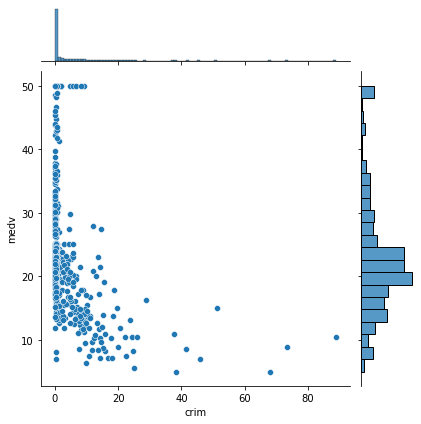

In [59]:
sns.jointplot(x=feature, y=target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [7]:
import scipy.stats as spst
spst.pearsonr(boston['crim'], boston['medv'])


(-0.3883046085868116, 1.1739870821941207e-19)

In [148]:
import scipy.stats as spst
spst.pearsonr(boston['tax'], boston['medv'])

(-0.4685359335677671, 5.637733627689083e-29)

In [8]:
boston.corr()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
crim,1.000000,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.226508
indus,0.406583,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.575822
chas,-0.055892,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.053524
nox,0.420972,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.538203
rm,-0.219247,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.315420
age,0.352734,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.574508
dis,-0.379670,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.702343
rad,0.625505,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.341151
tax,0.582764,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.364646
ptratio,0.289946,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,-0.440774


3) 관계 평가하기

- 범죄율이 증가할때 집값이 떨어지고 있다.(중간)

4) 추가 분석할 내용 정리

In [ ]:
- 범죄율이 거의 0%에 밀집되어있는 타운들 추가분석 필요

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

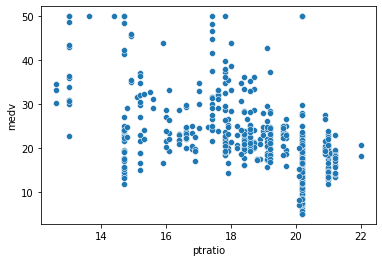

In [10]:
sns.scatterplot(x='ptratio', y='medv', data=boston)
plt.show()

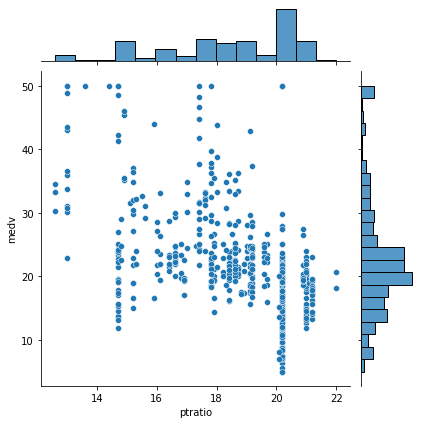

In [11]:
sns.jointplot(x='ptratio', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [14]:
spst.pearsonr(boston['ptratio'], boston['medv'])

(-0.507786685537562, 1.609509478472518e-34)

3) 관계 평가하기

- 교사 학생 비율과 집값은 관계가 있다. (중간 관계)

4) 추가 분석할 내용 정리

In [ ]:
- 교사 학생 비율을 3가지 범주로 구분해서 분석해보면 좋겠다.
- 범주의 특성을 파악할 필요있음

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

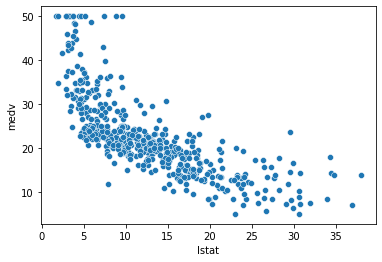

In [15]:
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.show()

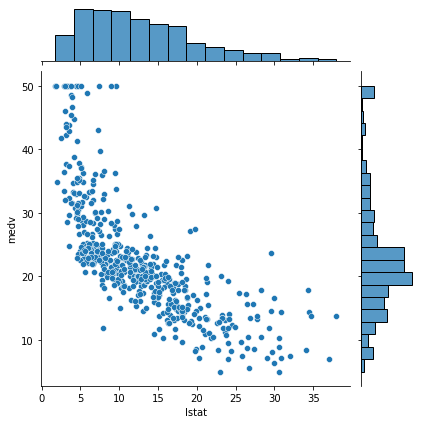

In [16]:
sns.jointplot(x='lstat', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [17]:
spst.pearsonr(boston['lstat'],boston['medv'])

(-0.7376627261740148, 5.08110339438697e-88)

3) 관계 평가하기

- 산점도를 봤을때 가운데 직선이 생기는 것으로 봐서 매우 관계가 있는 것으로 보인다.

4) 추가 분석할 내용 정리

- 하층민비율과 범죄비율을 동시에 비교해 집값에 영향이 있는지

#### ④ 추가1 --> medv(집값)

1) 시각화 : scatter, jointplot 

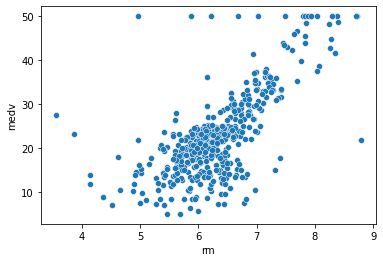

In [22]:
sns.scatterplot(x='rm', y='medv', data=boston)
plt.show()

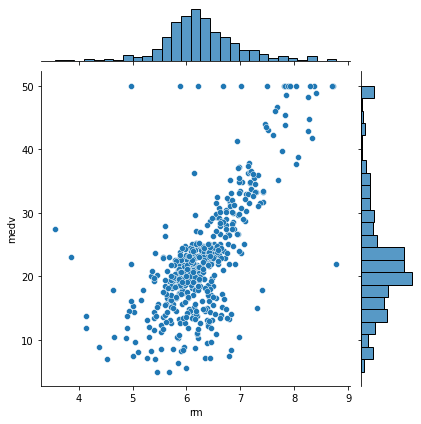

In [23]:
sns.jointplot(x='rm', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [24]:
spst.pearsonr(boston['rm'],boston['medv'])

(0.6953599470715394, 2.4872288710071593e-74)

3) 관계 평가하기

- 방 개수가 많을 수록 집값이 높아지는 것으로 보인다.

4) 추가 분석할 내용 정리

- 방이 적은데 집값이 높은 곳은 어떤 지역일까?

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값) : 강변이면 1

1) 시각화 : 평균비교 barplot

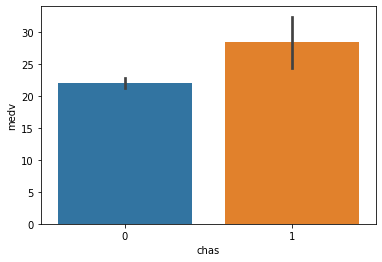

In [25]:
sns.barplot(x='chas', y='medv', data=boston)
plt.show()

2) 수치화 : t-test

In [147]:
chas0 = boston.loc[boston['chas']==0, 'medv']
chas1 = boston.loc[boston['chas']==1, 'medv']
print(chas0.mean())

22.093842887473482


In [30]:
spst.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [31]:
boston.corr()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
crim,1.000000,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.226508
indus,0.406583,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.575822
chas,-0.055892,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.053524
nox,0.420972,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.538203
rm,-0.219247,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.315420
age,0.352734,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.574508
dis,-0.379670,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.702343
rad,0.625505,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.341151
tax,0.582764,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.364646
ptratio,0.289946,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,-0.440774


3) 관계 평가하기

In [ ]:
- pvalue도 0에 가깝고, corr를 봐서도 강변 근처는 집값에 관계가 있는 것으로 보인다.

4) 추가 분석할 내용 정리

In [ ]:
- 강변근처에 사는 사람들의 신뢰구간 길이가 짧은 것으로 보아 표본이 부족하다

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

1) 시각화 : 평균비교 barplot

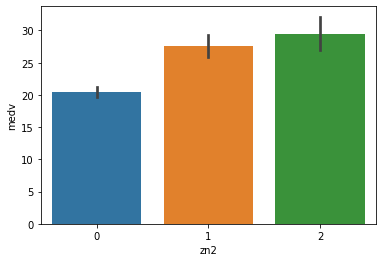

In [32]:
sns.barplot(x='zn2', y='medv', data=boston)
plt.show()

 차이가 별로 없는 애들은 묶어서 합쳐버리자

2) 수치화 : anova

In [36]:
zn2_0 = boston.loc[boston['zn2']==0, 'medv']
zn2_1 = boston.loc[boston['zn2']==1, 'medv']
zn2_2 = boston.loc[boston['zn2']==2, 'medv']

In [37]:
spst.f_oneway(zn2_0, zn2_1, zn2_2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

In [ ]:
- 대저택 비율이 높을수록 집값과 관련이 있는 것으로 보인다.

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

하위계층 비율, 방 갯수, 강변 위치

② 중간관계

대저택비율, 범죄율, 교사학생비율

③ 관계없음

# 범주형 Y

## 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [ ]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

2) 수치화 : 로지스틱회귀

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

2) 수치화 : 로지스틱회귀

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

## 신용도 분석 데이터 : 심화


![](https://storage.googleapis.com/kaggle-datasets-images/310/684/3503c6c827ca269cc00ffa66f2a9c207/dataset-cover.jpg)

|	칼럼명	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	Creditability	|	신용도	|	0 : 나쁜 신용도, 1 : 좋은 신용도|
|	AccountBalance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Employment	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7|
|	SexMarital	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	현 거주지 거주기간	|1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|CreditDuration	|신청한 대출기간(월)|	숫자|
|CreditAmount |	신청한 대출금액	||
|Age|	나이||

In [38]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"
usecols = ['Creditability','AccountBalance','Employment','SexMarital','CurrentAddress','CreditDuration','CreditAmount', 'Age']
credit = pd.read_csv(path, usecols=usecols)
credit.head()

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age
0,1,3,24,1249,2,4,2,28.0
1,1,2,9,276,3,4,4,22.0
2,1,1,18,1049,2,2,4,21.0
3,1,1,24,6419,5,2,4,NaN
4,1,3,12,1424,5,2,4,55.0


In [60]:
target = 'Creditability'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Creditability

1) 그래프 : histogram(hist), densityplot(kde)

In [125]:
feature='Age'

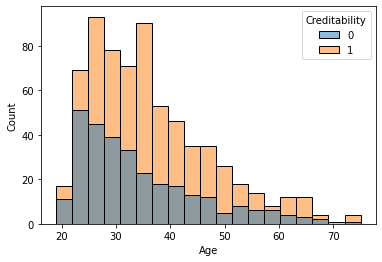

In [126]:
sns.histplot(x=feature, data=credit, hue= target)
plt.show()

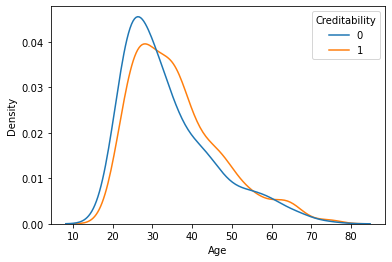

In [127]:
sns.kdeplot(x=feature, data=credit, hue= target, common_norm=False)
plt.show()

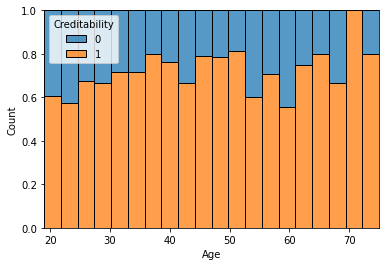

In [128]:
sns.histplot(x=feature, data=credit, bins=20, hue= target, multiple='fill')
plt.show()

2) 수치화 : 로지스틱회귀

In [64]:
import statsmodels.api as sm

In [66]:
credit[feature].isna().sum()

17

In [67]:
tmp = credit.loc[credit[feature].notnull()]
model = sm.Logit(tmp[target], tmp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.609024
         Iterations 5
Age    1.333286e-33
dtype: float64


3) 관계 평가하기

In [ ]:
- 30대 미만 인원들이 신용도가 낮은것으로 보인다
- 2~30대 인원들이 은행을 가장 많이 이용하는 것으로 보인다.

4) 추가 분석할 내용 정리

In [ ]:
- 50대 후반에 좋은 신용의 비율과 나쁜 신용의 비율의 차이가 왜 없는 것일까?

#### ② CreditDuration --> Creditability

In [69]:
feature = 'CreditDuration'

1) 그래프 : histogram, densityplot

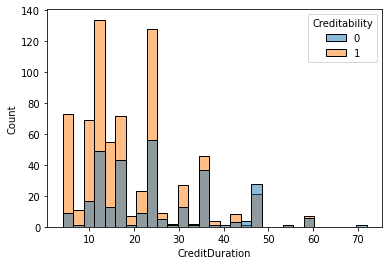

In [70]:
sns.histplot(x=feature, data=credit, hue=target)
plt.show()

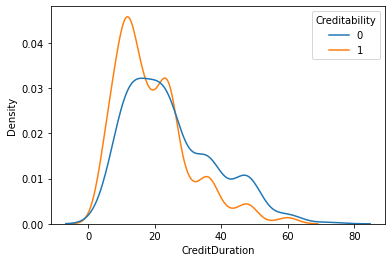

In [73]:
sns.kdeplot(x=feature, data=credit, hue=target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [71]:
tmp = credit.loc[credit[feature].notnull()]
model = sm.Logit(tmp[target], tmp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661576
         Iterations 4
CreditDuration    1.917447e-14
dtype: float64


3) 관계 평가하기

In [ ]:
- 신청한 대출기간이 적을수록 신용도가 높은것으로 보인다 (강)

4) 추가 분석할 내용 정리

#### ③ CreditAmount --> Creditability

1) 그래프 : histogram, densityplot

In [78]:
feature = 'CreditAmount'

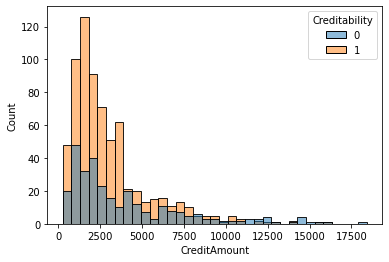

In [79]:
sns.histplot(x=feature, data=credit, hue=target)
plt.show()

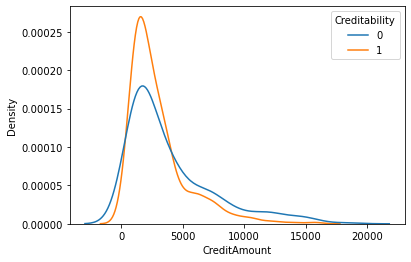

In [80]:
sns.kdeplot(x=feature, data=credit, hue=target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [81]:
tmp = credit.loc[credit[feature].notnull()]
model = sm.Logit(tmp[target], tmp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.670231
         Iterations 4
CreditAmount    1.236971e-10
dtype: float64


3) 관계 평가하기

In [ ]:
- 신청한 대출금액이 낮을수록 신용도가 높다(강)

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① AccountBalance --> Creditability

In [130]:
feature = 'AccountBalance'

1) 교차표(pd.crosstab())

In [131]:
pd.crosstab(credit[target],credit[feature], normalize='columns')

AccountBalance,1,2,3
Creditability,,,
0,0.492701,0.390335,0.131291
1,0.507299,0.609665,0.868709


2) 시각화( Stacked Bar, Mosaic)

Creditability          0         1
AccountBalance                    
1               0.492701  0.507299
2               0.390335  0.609665
3               0.131291  0.868709


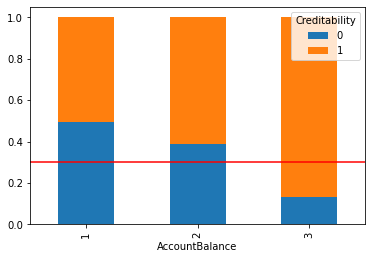

In [132]:
temp = pd.crosstab(credit[feature],credit[target], normalize='index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-credit[target].mean(), color = 'red')
plt.show()

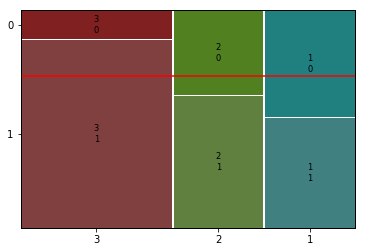

In [133]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [feature, target])

plt.axhline(credit[target].mean(), color = 'r')
plt.show()

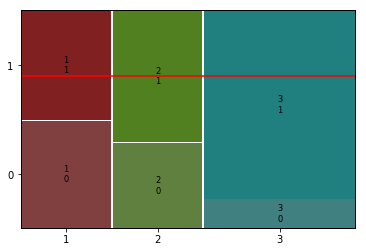

In [135]:
temp = credit.copy()
temp = temp.sort_values([feature, target])
mosaic(temp, [feature, target])

plt.axhline(temp[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [136]:
table = pd.crosstab(credit[target],credit[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p_value : ', result[1])

카이제곱통계량 :  120.84376361168343
p_value :  5.7426208775458905e-27


4) 관계 평가하기

In [ ]:
- 은행잔고가 균형이 좋을수록 신용도가 높다 (강)

5) 추가 분석하기

#### ② Employment --> Creditability

1) 교차표(pd.crosstab())

In [137]:
feature = 'Employment'

In [138]:
pd.crosstab(credit[feature],credit[target],normalize='index')

Creditability,0,1
Employment,,
1,0.370968,0.629032
2,0.406977,0.593023
3,0.306785,0.693215
4,0.224138,0.775862
5,0.252964,0.747036


2) 시각화( Stacked Bar, Mosaic)

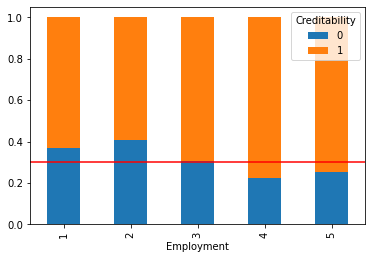

In [139]:
tmp =  pd.crosstab(credit[feature],credit[target],normalize='index')
tmp.plot.bar(stacked = True)
plt.axhline(1-credit[target].mean(), color='r')
plt.show()

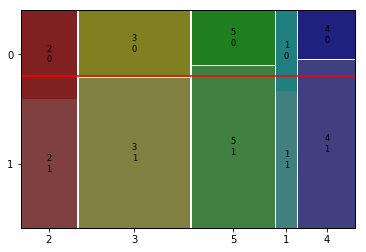

In [140]:
mosaic(credit,[feature,target])
plt.axhline(credit[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [141]:
table=pd.crosstab(credit[target],credit[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p_value : ', result[1])

카이제곱통계량 :  18.3682738466968
p_value :  0.001045452349140254


4) 관계 평가하기

- 무직과 1년미만의 직장생활을 가진사람들은 신용도가 낮은 반면, 어느정도 일을하여
2년이상부터 신용도를 회복하는 것으로 보인다.

5) 추가 분석하기

#### ③ SexMarital --> Creditability

1) 교차표(pd.crosstab())

In [142]:
feature='SexMarital'

In [143]:
pd.crosstab(credit[target],credit[feature],normalize='columns')

SexMarital,1,2,3,4
Creditability,,,,
0,0.4,0.351613,0.266423,0.271739
1,0.6,0.648387,0.733577,0.728261


2) 시각화( Stacked Bar, Mosaic)

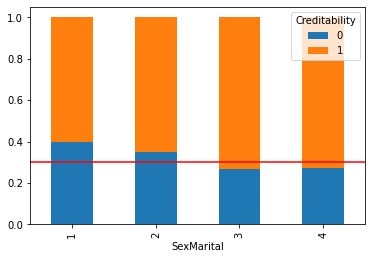

In [144]:
tmp =  pd.crosstab(credit[feature],credit[target],normalize='index')
tmp.plot.bar(stacked = True)
plt.axhline(1-credit[target].mean(), color='r')
plt.show()

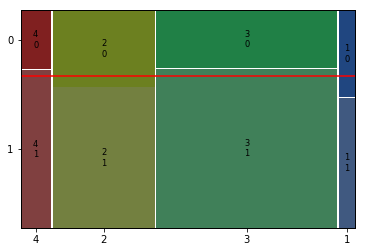

In [145]:
mosaic(credit,[feature,target])
plt.axhline(credit[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [146]:
table=pd.crosstab(credit[target],credit[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p_value : ', result[1])

카이제곱통계량 :  9.60521395933605
p_value :  0.02223800546926877


4) 관계 평가하기

In [ ]:
- 관계가 전혀 없는것으로 보인다.(약)

5) 추가 분석하기

#### ④ CurrentAddress --> Creditability

1) 교차표(pd.crosstab())

In [113]:
feature = 'CurrentAddress'

In [114]:
pd.crosstab(credit[target],credit[feature],normalize='columns')

CurrentAddress,1,2,3,4
Creditability,,,,
0,0.276923,0.314935,0.288591,0.300242
1,0.723077,0.685065,0.711409,0.699758


2) 시각화( Stacked Bar, Mosaic)

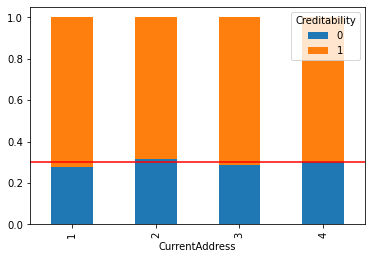

In [115]:
tmp =  pd.crosstab(credit[feature],credit[target],normalize='index')
tmp.plot.bar(stacked = True)
plt.axhline(1-credit[target].mean(), color='r')
plt.show()

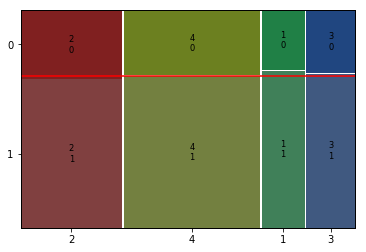

In [118]:
mosaic(credit,[feature,target])
plt.axhline(credit[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [117]:
table=pd.crosstab(credit[target],credit[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p_value : ', result[1])

카이제곱통계량 :  0.7492964483880513
p_value :  0.8615521320413175


4) 관계 평가하기

In [ ]:
-관계없는것으로 보인다(약)

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

Employment, CreditDuration, CreditAmount, Age

② 중간관계

③ 관계없음

SexMarital, CurrentAddress